In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lds.generative_model import lds_generative
from lds.filtering import lds_filtering
from network.network import train_network

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [40]:
np.random.seed(10)

transition_std = 0.09
obs_std = 0.35
init_std = 0.09

learning_rate = 0.125

In [41]:
x = np.concatenate([
    np.array([np.array([1., 1.]) for _ in range(20)]), 
    np.array([np.array([1., 0.]) for _ in range(20)])
], axis=0)

w, r = lds_generative(transition_std=transition_std, obs_std=obs_std, init_std=init_std, stimuli=x)

In [42]:
network, w_history, B_history = train_network(x, r, learning_rate, dt=1.0)

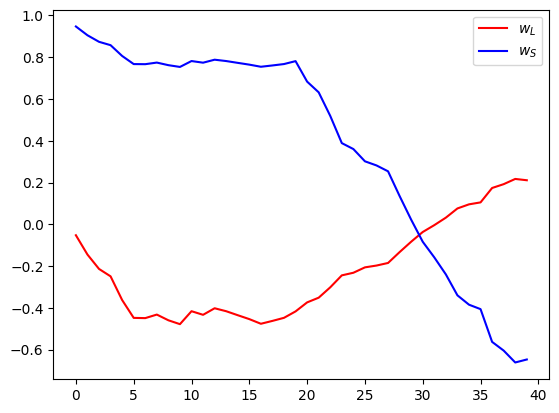

In [43]:
plt.plot(w_history[:, 0], "r-", label=r"$w_{L}$")
plt.plot(w_history[:, 1], "b-", label=r"$w_{S}$")
plt.legend()

In [44]:
Sigma = np.linalg.inv(np.array([np.eye(x.shape[-1]) for _ in range(len(x))]) - B_history)

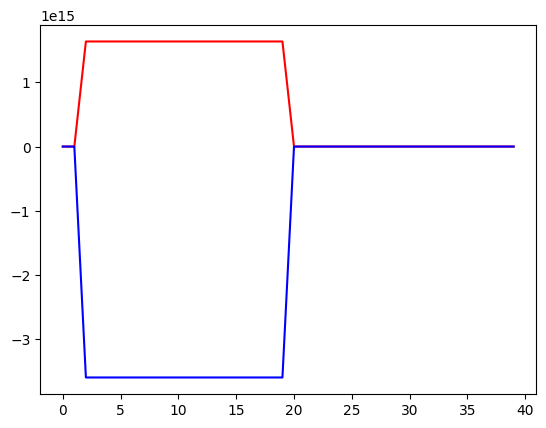

In [45]:
plt.plot(Sigma[:, 0, 0], "r-", label=r"$\Sigma_{LL}$")
plt.plot(Sigma[:, 1, 0], "b-", label=r"$\Sigma_{SL}$")